<a href="https://colab.research.google.com/github/fideslynn/data_science_fundamentals/blob/main/InterestvsPrincipalGraph_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interest vs Principal Graph Part 2
Submitted by Fides Gastanes - Lynn

We want to produce a graph where a black plot represents the 30 year mortgage at 5% and the blue line represents the 30 year mortgage at 3%. What is graphed is the cumulative interest paid over the course of the loan.

In [2]:
# To import pandas and pyplot libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [1]:
# To mount data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# To load dataset

filename = '/content/drive/MyDrive/CODING_DOJO/DATA_SCIENCE_BOOTCAMP/(03) WEEK 3 - Python for Data Visualization/mortgages.csv'
df = pd.read_csv(filename)

In [4]:
# To check if data loaded properly

df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


## Exploring the Dataset

In [5]:
# To determine how many rows and columns

df.shape

(1080, 8)

There are 1,080 rows and 8 columns.

In [6]:
# To determine the data types of each variable

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


## Cleaning the Data

In [7]:
# To determine if there are duplicate rows

len(df[df.duplicated()])


0

There are no duplicate rows in the dataset.

In [8]:
# To identify missing values

df.isnull().sum()

Month               0
Starting Balance    0
Repayment           0
Interest Paid       0
Principal Paid      0
New Balance         0
Mortgage Name       0
Interest Rate       0
dtype: int64

There are mo NaN values.

In [9]:
# To determine possible values and counts

df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

## Filtering the Dataset

#### Mortgage Name Filter

In [10]:
# To create a filter so the Mortgage Name is '30 Year' 


thirty_years_filter = df['Mortgage Name'] == '30 Year'

# To check how many rows correspond to 30 years

thirty_years = df[thirty_years_filter]
len(thirty_years)

720

##### 3% Interest Rate Data Filter

In [11]:
# To create a filter for an interest rate of 3%

interest_rate_3_filter = df['Interest Rate'] == 0.03

# To check how many rows correspond to 3% Interest Rate

interest_rate_3 = df[interest_rate_3_filter]
len(interest_rate_3)

540

##### 5% Interest Rate Data Filters

In [12]:
# To create a filter for an interest rate of 3%

interest_rate_5_filter = df['Interest Rate'] == 0.05

# To check how many rows correspond to 3% Interest Rate

interest_rate_5 = df[interest_rate_5_filter]
len(interest_rate_5)

540

### Creating New Dataframes 

##### 3% Interest Rate Dataframe

In [14]:
# To define a new dataframe based on both 30-year and 3% Interest Rate filters

IR3_df = pd.DataFrame(df[thirty_years_filter & interest_rate_3_filter])
IR3_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


##### 5% Interest Rate Dataframe

In [15]:
# To define a new dataframe based on both 30-year and 5% Interest Rate filters

IR5_df = pd.DataFrame(df[thirty_years_filter & interest_rate_5_filter])
IR5_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


## Creating the Graph

### Assigning the x and y axes for both lines

In [16]:
# To make the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid

# For 3% Interest Paid
x_3 = IR3_df['Month']
y_3 = IR3_df.groupby([thirty_years_filter, interest_rate_3_filter])[['Interest Paid']].cumsum()

# For 3% Interest Paid
x_5 = IR5_df['Month']
y_5 = IR5_df.groupby([thirty_years_filter, interest_rate_5_filter])[['Interest Paid']].cumsum()

# To check if the numbers are correct

print('''
3% INTEREST RATE CUMULATIVE SUM: 
''')
print(y_3)

print('''
5% INTEREST RATE CUMULATIVE SUM: 
''')
print(y_5)


3% INTEREST RATE CUMULATIVE SUM: 

     Interest Paid
0          1000.00
1          1998.28
2          2994.84
3          3989.67
4          4982.77
..             ...
355      207064.13
356      207080.87
357      207093.44
358      207101.82
359      207106.01

[360 rows x 1 columns]

5% INTEREST RATE CUMULATIVE SUM: 

     Interest Paid
360        1666.66
361        3331.32
362        4993.97
363        6654.60
364        8313.20
..             ...
715      372928.64
716      372964.02
717      372990.60
718      373008.35
719      373017.23

[360 rows x 1 columns]


### Plotting the graph

The x axis for both lines represent time in months. The y axes represent the cumulative sum for the Interest Paid. The blue line is the cumulative sum for 3% Interest Rate while the black line is for %5 Interest Rate.

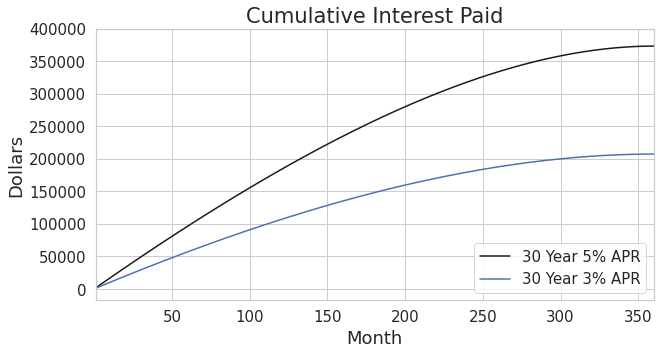

In [43]:
# Black: c = 'k'
# Blue: c = 'b'

# To change the size of chart
plt.figure(figsize = (10,5))

plt.plot(x_5, y_5, c='k')
plt.plot(x_3, y_3, c='b')


plt.xlabel('Month', fontsize = 18) # To label x axis
plt.xticks(fontsize = 15) # To change font size of x ticks

plt.ylabel('Dollars', fontsize = 18) # To label y axis
plt.yticks(fontsize = 15) # To change font size of y ticks
plt.ylim(top = 400000) # Set the y limit to 400000

plt.title('Cumulative Interest Paid', fontsize = 21) # To put title for chart and change fontsize

plt.margins(x = 0) # To make lines go to the edge of the chart

# To put a legend on the lower right portion with 21 fontsize
plt.legend(['30 Year 5% APR', '30 Year 3% APR'], 
           loc='lower right', 
           fontsize = 15) 


plt.show()